# Data Science Final Project

### Quirin Stier

### Matr.nr.: 784229


# Data Analysis

* Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import sklearn.decomposition as skd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-deep')

In [2]:
dfTrainX = pd.read_csv("weather_data_train.csv", index_col = "datetime", sep = ";", decimal = ",", infer_datetime_format = True)
dfTrainY = pd.read_csv("weather_data_train_labels.csv", index_col = "datetime", sep = ";", decimal = ",", infer_datetime_format = True)

dfTestX = pd.read_csv("weather_data_test.csv", index_col = "datetime", sep = ";", decimal = ",", infer_datetime_format = True)
dfTestY = pd.read_csv("weather_data_test_labels.csv", index_col = "datetime", sep = ";", decimal = ",", infer_datetime_format = True)

dfAnalysis = dfTrainX.copy()
dfAnalysis["U_mu"] = dfTrainY["U_mu"]
dfAnalysis["OBSERVED"] = dfTrainY["OBSERVED"]

In [3]:
dfTrainX.head(5)

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2006-09-20,14.4875,751.3000,751.6375,3.500,13.30,15.95,11.425,12.550,0.926964,1.008571,0.979821,1.142857,0.320,4.205,155.590714,1.994286
2006-09-21,14.1875,758.0625,758.3625,3.625,11.20,15.95,27.500,11.025,4.801250,7.965536,7.679821,0.267857,5.780,6.125,147.142857,1.942143
2006-09-22,15.3000,762.1125,762.4375,3.000,13.15,16.70,12.875,12.875,3.754286,1.824107,1.742679,0.857143,1.445,10.580,23.553571,0.122143
2006-09-23,14.0250,766.4000,766.7625,2.500,12.00,16.65,7.200,12.500,4.896429,0.417143,0.431250,0.285714,0.180,10.125,35.974286,0.968571
2006-09-24,14.2750,764.7125,765.0500,3.250,12.55,15.80,10.625,12.475,3.659286,1.672679,1.680000,0.785714,3.645,3.920,16.267857,1.005000


In [4]:
dfTrainX.tail(5)

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2015-08-29,17.7000,757.5000,757.8250,4.250,15.20,19.30,29.000,11.7625,5.765714,4.474286,4.545000,1.071429,2.880,8.000,19.428571,2.196964
2015-08-30,15.1750,762.1625,762.5000,2.250,11.50,18.95,26.500,12.0375,10.782143,0.091250,0.082857,0.500000,2.880,2.205,25.428571,1.642679
2015-08-31,14.9000,763.0625,763.4125,2.250,12.60,17.60,20.625,11.9625,14.617143,0.194107,0.195536,0.500000,18.000,6.480,67.696429,3.111250
2015-09-01,15.3625,760.7750,761.1125,1.750,13.90,17.25,18.625,13.6000,4.174107,1.230714,1.186964,0.785714,3.380,1.445,49.410714,0.908571
2015-09-02,14.0875,758.7375,759.0875,3.125,12.45,15.70,20.625,12.3000,1.378393,0.065536,0.049821,0.696429,0.005,0.500,54.553571,0.505714


In [5]:
dfTrainX.describe()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,6.780096,758.805939,759.148643,3.674008,4.888025,8.661810,25.952053,3.373812,4.466326,4.062051,4.058249,1.345066,3.662163,4.132288,98.008192,2.768010
std,8.595021,8.521047,8.525485,1.222216,8.595641,8.910328,12.230215,8.083700,5.254302,7.278152,7.274098,1.255878,7.034635,5.929607,106.710901,4.497696
min,-19.312500,725.525000,725.875000,1.000000,-26.200000,-16.950000,0.625000,-22.912500,0.016429,0.005000,0.005714,0.000000,0.000000,0.000000,0.000000,0.008095
25%,0.987500,753.471875,753.821875,2.750000,-0.250000,2.250000,16.421875,-1.612500,0.928571,0.492604,0.500000,0.571429,0.125000,0.382500,20.408036,0.582143
50%,6.537500,758.850000,759.187500,3.500000,4.750000,8.125000,24.875000,3.118750,2.568839,1.516964,1.519107,0.982143,0.980000,2.000000,55.928571,1.313125
75%,13.953125,764.178125,764.525000,4.375000,11.950000,16.200000,35.375000,10.100000,6.169955,4.395759,4.418750,1.696429,3.920000,5.780000,140.008884,3.089107
max,25.787500,790.425000,790.812500,9.750000,23.150000,28.500000,50.000000,21.462500,66.571250,108.117143,108.515536,17.571429,93.845000,105.125000,645.760000,77.449821


In [6]:
dfTestX.head(5)

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2015-09-03,13.7375,759.3625,759.6750,3.125000,12.75,14.80,14.775,12.7500,2.105536,0.122679,0.127857,1.553571,2.205,0.320,115.733571,1.008571
2015-09-04,14.8250,758.1750,758.5125,2.250000,12.70,17.05,18.125,12.8250,7.345000,1.782143,1.755536,1.357143,13.520,3.645,68.125000,2.165000
2015-09-05,14.2750,752.7375,753.0625,2.750000,13.00,16.25,21.350,11.7625,1.710714,1.051250,1.099821,0.785714,2.000,0.125,77.037143,1.434107
2015-09-06,13.1250,753.1750,753.5125,1.857143,11.25,15.30,20.875,11.6625,5.679286,0.250714,0.252679,0.809524,3.125,3.920,53.839286,1.474107
2015-09-07,12.0875,753.8500,754.1875,3.750000,11.15,13.85,19.125,11.2125,0.678393,0.202857,0.206964,4.500000,0.845,0.405,64.410714,0.541250


In [7]:
dfTestX.tail(5)

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2019-05-17,13.783333,769.245833,769.587500,1.833333,10.50,16.60,40.500000,2.200000,14.795362,1.399982,1.398533,1.710145,28.880,5.120,88.869565,1.419130
2019-05-18,15.508333,766.175000,766.512500,2.625000,12.60,18.35,41.666667,3.900000,15.223406,1.583696,1.557663,2.331522,27.380,6.845,57.971014,2.312174
2019-05-19,16.595833,763.275000,763.616667,3.958333,13.95,19.25,43.125000,7.008333,7.622156,0.225435,0.245797,0.650362,6.125,6.125,58.288043,2.259058
2019-05-20,17.258333,761.470833,761.804167,3.500000,14.85,18.75,36.458333,10.033333,4.692101,0.449982,0.438678,0.869565,1.805,6.125,35.824275,0.937971
2019-05-21,18.433333,759.391667,759.733333,2.333333,15.60,21.80,30.583333,11.991667,7.862319,0.266014,0.271884,0.753623,1.280,14.580,21.818841,1.387754


In [8]:
dfTestX.describe()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,6.367627,759.366402,759.708989,3.608996,4.546137,8.171880,24.827432,2.627458,3.930741,4.177895,4.183092,1.328532,3.790727,3.842459,74.882398,2.485444
std,8.180675,8.769324,8.772496,1.237955,8.159152,8.491253,11.270424,7.589160,4.388686,7.227291,7.232681,1.229913,7.189489,5.682045,90.120956,3.810358
min,-22.675000,729.816667,730.175000,1.333333,-23.650000,-21.000000,1.950000,-25.912500,0.014286,0.008571,0.005000,0.000000,0.000000,0.000000,0.000000,0.016964
25%,0.768750,753.696875,754.048958,2.708333,-0.450000,1.900000,16.079167,-1.990625,0.829198,0.486354,0.495091,0.589797,0.125000,0.320000,13.556483,0.516898
50%,5.535417,759.277083,759.616667,3.416667,3.675000,7.150000,24.221739,1.904083,2.394286,1.582056,1.590982,0.982143,0.845000,1.805000,40.579710,1.238759
75%,13.424554,765.061458,765.389583,4.375000,11.437500,15.687500,32.697917,8.252083,5.366964,4.793641,4.820476,1.611137,3.920000,5.120000,96.510223,2.762641
max,26.145833,785.500000,785.879167,10.791667,23.650000,28.750000,49.791667,20.133333,34.850714,89.848571,89.807857,12.618182,69.620000,68.445000,488.364928,39.629048


In [9]:
dfTrainX.columns

Index(['T_mu', 'Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu',
       'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var',
       'Td_var'],
      dtype='object')

In [10]:
len(dfTrainX.columns)

16

In [11]:
lstColumnsToNumeric = ['T_mu', 'Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu',
       'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var',
       'Td_var', 'U_mu']

In [12]:
dfTrainX.head(5)

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2006-09-20,14.4875,751.3000,751.6375,3.500,13.30,15.95,11.425,12.550,0.926964,1.008571,0.979821,1.142857,0.320,4.205,155.590714,1.994286
2006-09-21,14.1875,758.0625,758.3625,3.625,11.20,15.95,27.500,11.025,4.801250,7.965536,7.679821,0.267857,5.780,6.125,147.142857,1.942143
2006-09-22,15.3000,762.1125,762.4375,3.000,13.15,16.70,12.875,12.875,3.754286,1.824107,1.742679,0.857143,1.445,10.580,23.553571,0.122143
2006-09-23,14.0250,766.4000,766.7625,2.500,12.00,16.65,7.200,12.500,4.896429,0.417143,0.431250,0.285714,0.180,10.125,35.974286,0.968571
2006-09-24,14.2750,764.7125,765.0500,3.250,12.55,15.80,10.625,12.475,3.659286,1.672679,1.680000,0.785714,3.645,3.920,16.267857,1.005000


In [13]:
dfAnalysis.head(5)

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,U_mu,OBSERVED
datetime,,,,,,,,,,,,,,,,,,
2006-09-20,14.4875,751.3000,751.6375,3.500,13.30,15.95,11.425,12.550,0.926964,1.008571,0.979821,1.142857,0.320,4.205,155.590714,1.994286,88.625,0
2006-09-21,14.1875,758.0625,758.3625,3.625,11.20,15.95,27.500,11.025,4.801250,7.965536,7.679821,0.267857,5.780,6.125,147.142857,1.942143,82.000,1
2006-09-22,15.3000,762.1125,762.4375,3.000,13.15,16.70,12.875,12.875,3.754286,1.824107,1.742679,0.857143,1.445,10.580,23.553571,0.122143,86.000,1
2006-09-23,14.0250,766.4000,766.7625,2.500,12.00,16.65,7.200,12.500,4.896429,0.417143,0.431250,0.285714,0.180,10.125,35.974286,0.968571,91.000,1
2006-09-24,14.2750,764.7125,765.0500,3.250,12.55,15.80,10.625,12.475,3.659286,1.672679,1.680000,0.785714,3.645,3.920,16.267857,1.005000,89.000,1


In [14]:
dfAnalysis.tail(5)

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,U_mu,OBSERVED
datetime,,,,,,,,,,,,,,,,,,
2015-08-29,17.7000,757.5000,757.8250,4.250,15.20,19.30,29.000,11.7625,5.765714,4.474286,4.545000,1.071429,2.880,8.000,19.428571,2.196964,69.875,1
2015-08-30,15.1750,762.1625,762.5000,2.250,11.50,18.95,26.500,12.0375,10.782143,0.091250,0.082857,0.500000,2.880,2.205,25.428571,1.642679,82.625,0
2015-08-31,14.9000,763.0625,763.4125,2.250,12.60,17.60,20.625,11.9625,14.617143,0.194107,0.195536,0.500000,18.000,6.480,67.696429,3.111250,83.750,1
2015-09-01,15.3625,760.7750,761.1125,1.750,13.90,17.25,18.625,13.6000,4.174107,1.230714,1.186964,0.785714,3.380,1.445,49.410714,0.908571,89.750,1
2015-09-02,14.0875,758.7375,759.0875,3.125,12.45,15.70,20.625,12.3000,1.378393,0.065536,0.049821,0.696429,0.005,0.500,54.553571,0.505714,89.375,0


In [15]:
dfAnalysis.describe()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,U_mu,OBSERVED
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,6.780096,758.805939,759.148643,3.674008,4.888025,8.661810,25.952053,3.373812,4.466326,4.062051,4.058249,1.345066,3.662163,4.132288,98.008192,2.768010,80.813907,0.605732
std,8.595021,8.521047,8.525485,1.222216,8.595641,8.910328,12.230215,8.083700,5.254302,7.278152,7.274098,1.255878,7.034635,5.929607,106.710901,4.497696,11.897763,0.488771
min,-19.312500,725.525000,725.875000,1.000000,-26.200000,-16.950000,0.625000,-22.912500,0.016429,0.005000,0.005714,0.000000,0.000000,0.000000,0.000000,0.008095,34.285714,0.000000
25%,0.987500,753.471875,753.821875,2.750000,-0.250000,2.250000,16.421875,-1.612500,0.928571,0.492604,0.500000,0.571429,0.125000,0.382500,20.408036,0.582143,74.093750,0.000000
50%,6.537500,758.850000,759.187500,3.500000,4.750000,8.125000,24.875000,3.118750,2.568839,1.516964,1.519107,0.982143,0.980000,2.000000,55.928571,1.313125,83.500000,1.000000
75%,13.953125,764.178125,764.525000,4.375000,11.950000,16.200000,35.375000,10.100000,6.169955,4.395759,4.418750,1.696429,3.920000,5.780000,140.008884,3.089107,89.750000,1.000000
max,25.787500,790.425000,790.812500,9.750000,23.150000,28.500000,50.000000,21.462500,66.571250,108.117143,108.515536,17.571429,93.845000,105.125000,645.760000,77.449821,99.875000,1.000000


## Data checking for missing values

### Training data

In [16]:
timeStart = pd.Timestamp("2006-09-20")
timeEnd = pd.Timestamp("2015-09-02")
timeDiff = timeStart-timeEnd
intDayDiff = (-1)*timeDiff.days + 1 # + 1 because of time diff - when counting absolute numbers of days, time diff of days will leave effectively one day out
intDataDayCoverage = dfTrainX.shape[0]
print("#--------------------------------#")
print("Day range:", intDayDiff)
print("#--------------------------------#")
print("Days covered with data:", intDataDayCoverage)
print("#--------------------------------#")
print("Number missing days:", intDayDiff - intDataDayCoverage)
print("#--------------------------------#")

#--------------------------------#
Day range: 3270
#--------------------------------#
Days covered with data: 3140
#--------------------------------#
Number missing days: 130
#--------------------------------#


### Equidistant timeseries

In [17]:
intLenTS = len(dfTrainX.iloc[:,0])
intUnixDayNormalize = 86400000000000 # Length of one day in ms for transforming datetime in unix format to number of days
arrTimeDifference = np.array((pd.to_numeric(pd.to_datetime(dfTrainX.index[0:intLenTS-1])-pd.to_datetime(dfTrainX.index[1:intLenTS]))/intUnixDayNormalize))
intNumberTimeGaps = sum(arrTimeDifference!=-1.0)
print("#--------------------------------------------------------------------------------------------------------------------------------#")
print("There are", intNumberTimeGaps, "time gaps in the data")
arrIdx = np.where(arrTimeDifference != -1.0)
arrTimeDifferences = arrTimeDifference[arrIdx]
print("#--------------------------------------------------------------------------------------------------------------------------------#")
print("Look at the time differences in the data", arrTimeDifferences)
maxTimediff = min(arrTimeDifference)
intIdxMaxDiff = np.where(arrTimeDifference == maxTimediff)[0][0]
print("#--------------------------------------------------------------------------------------------------------------------------------#")
print("The maximal time difference in days is", (-1)*maxTimediff-1)
print("#--------------------------------------------------------------------------------------------------------------------------------#")
print("Look at following part of data with biggest time gap")
display(dfTrainX.iloc[702:704,:])
print("#--------------------------------------------------------------------------------------------------------------------------------#")
print((-1)*sum(arrTimeDifferences)-intNumberTimeGaps) # - intNumberTimeGaps, since for every time gap an additional day is calculated, we are interested in missing days between and not time difference

#--------------------------------------------------------------------------------------------------------------------------------#
There are 98 time gaps in the data
#--------------------------------------------------------------------------------------------------------------------------------#
Look at the time differences in the data [-2. -4. -2. -2. -2. -2. -2. -2. -2. -2. -2. -4. -4. -2. -4. -3. -2. -2.
 -2. -2. -2. -2. -8. -5. -2. -2. -3. -2. -3. -2. -3. -2. -2. -2. -2. -2.
 -2. -3. -3. -2. -2. -2. -3. -2. -2. -2. -2. -2. -2. -2. -2. -5. -3. -2.
 -2. -2. -3. -2. -2. -2. -2. -2. -3. -2. -2. -2. -2. -4. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2.]
#--------------------------------------------------------------------------------------------------------------------------------#
The maximal time difference in days is 7.0
#----------------------------------------------------------------------------------------

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2008-09-22,11.8000,771.6125,771.95,2.75,9.65,13.60,14.125,9.4000,4.268571,1.126964,1.080000,1.071429,5.445,5.780,39.839286,0.948571
2008-09-30,6.9875,750.8000,751.15,2.75,3.05,10.75,37.375,3.3125,13.238393,0.111429,0.102857,1.071429,1.125,8.405,249.982143,1.144107


#--------------------------------------------------------------------------------------------------------------------------------#
130.0


### Nan values

In [18]:
sumNan = 0
for i in range(len(dfTrainX.iloc[0,:])):
    sumNan += (sum(dfTrainX.iloc[:,i].isnull()))
print("Number of NaN entries:", sumNan)

Number of NaN entries: 0


### Test data

In [19]:
timeStart = pd.Timestamp("2015-09-03")
timeEnd = pd.Timestamp("2019-05-21")
timeDiff = timeStart-timeEnd
intDayDiff = (-1)*timeDiff.days + 1 # + 1 because of time diff - when counting absolute numbers of days, time diff of days will leave effectively one day out
intDataDayCoverage = dfTestX.shape[0]
print("#--------------------------------#")
print("Day range:", intDayDiff)
print("#--------------------------------#")
print("Days covered with data:", intDataDayCoverage)
print("#--------------------------------#")
print("Number missing days:", intDayDiff - intDataDayCoverage)
print("#--------------------------------#")

#--------------------------------#
Day range: 1357
#--------------------------------#
Days covered with data: 1346
#--------------------------------#
Number missing days: 11
#--------------------------------#


### Equidistant timeseries

In [20]:
intLenTS = len(dfTestX.iloc[:,0])
intUnixDayNormalize = 86400000000000 # Length of one day in ms for transforming datetime in unix format to number of days
arrTimeDifference = np.array((pd.to_numeric(pd.to_datetime(dfTestX.index[0:intLenTS-1])-pd.to_datetime(dfTestX.index[1:intLenTS]))/intUnixDayNormalize))
intNumberTimeGaps = sum(arrTimeDifference!=-1.0)
print("#--------------------------------------------------------------------------------------------------------------------------------#")
print("There are", intNumberTimeGaps, "time gaps in the data")
arrIdx = np.where(arrTimeDifference != -1.0)
arrTimeDifferences = arrTimeDifference[arrIdx]
print("#--------------------------------------------------------------------------------------------------------------------------------#")
print("Look at the time differences in the data", arrTimeDifferences)
maxTimediff = min(arrTimeDifference)
intIdxMaxDiff = np.where(arrTimeDifference == maxTimediff)[0][0]
print("#--------------------------------------------------------------------------------------------------------------------------------#")
print("The maximal time difference in days is", (-1)*maxTimediff-1)
print("#--------------------------------------------------------------------------------------------------------------------------------#")
print("Look at following part of data with biggest time gap")
display(dfTestX.iloc[702:704,:])
print("#--------------------------------------------------------------------------------------------------------------------------------#")
print((-1)*sum(arrTimeDifferences)-intNumberTimeGaps)

#--------------------------------------------------------------------------------------------------------------------------------#
There are 10 time gaps in the data
#--------------------------------------------------------------------------------------------------------------------------------#
Look at the time differences in the data [-2. -2. -2. -2. -2. -2. -2. -2. -2. -3.]
#--------------------------------------------------------------------------------------------------------------------------------#
The maximal time difference in days is 2.0
#--------------------------------------------------------------------------------------------------------------------------------#
Look at following part of data with biggest time gap


,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2017-08-10,18.4875,761.195833,761.520833,4.125000,17.20,20.1,11.5000,14.5500,1.240272,1.060417,1.077373,1.244565,0.020,0.98,1.142857,0.567826
2017-08-11,17.5875,761.000000,761.325000,2.708333,14.95,19.7,10.5375,14.5375,4.234185,0.255652,0.264565,0.737319,0.605,4.50,7.739821,0.448533


#--------------------------------------------------------------------------------------------------------------------------------#
11.0


### Nan values

In [21]:
sumNan = 0
for i in range(len(dfTestX.iloc[0,:])):
    sumNan += (sum(dfTestX.iloc[:,i].isnull()))
print("Number of NaN entries:", sumNan)

Number of NaN entries: 0


## Time series correlation

In [22]:
columns = ["Var1", "Var2", "Lag", "Correlation"]
dfTSCrossCorr = pd.DataFrame(columns = columns)

for i in range(18):
    for j in range(i+1, 18):
        for k in range(7):
            corr = dfAnalysis.iloc[:,i].corr(dfAnalysis.iloc[:,j].shift(k))
            dfTSCrossCorr = dfTSCrossCorr.append({"Var1": i, "Var2": j, "Lag": k, "Correlation": corr}, ignore_index = True)

In [23]:
dfTSCCTrue = dfTSCrossCorr[(dfTSCrossCorr["Correlation"] > 0.7) | (dfTSCrossCorr["Correlation"] < -0.7)]
dfCorrGroups = dfTSCCTrue.groupby(["Var1", "Var2"])["Correlation"].max()
tsColumns = dfAnalysis.columns
lstCorrVar = []
for i in range(len(dfCorrGroups)):
    idxF = int(dfCorrGroups.index[i][0])
    idxS = int(dfCorrGroups.index[i][1])
    lstCorrVar.append([tsColumns[idxF], tsColumns[idxS]])
lstCorrVar

[['T_mu', 'Tn_mu'],
 ['T_mu', 'Tx_mu'],
 ['T_mu', 'Td_mu'],
 ['Po_mu', 'P_mu'],
 ['Tn_mu', 'Tx_mu'],
 ['Tn_mu', 'Td_mu'],
 ['Tx_mu', 'Td_mu'],
 ['Po_var', 'P_var']]

## Histograms
### Min and Max temperature (Mean over past days) - Mean temperature (over day) - Mean pressure weather station level Po - sea level P - Relative Humidity

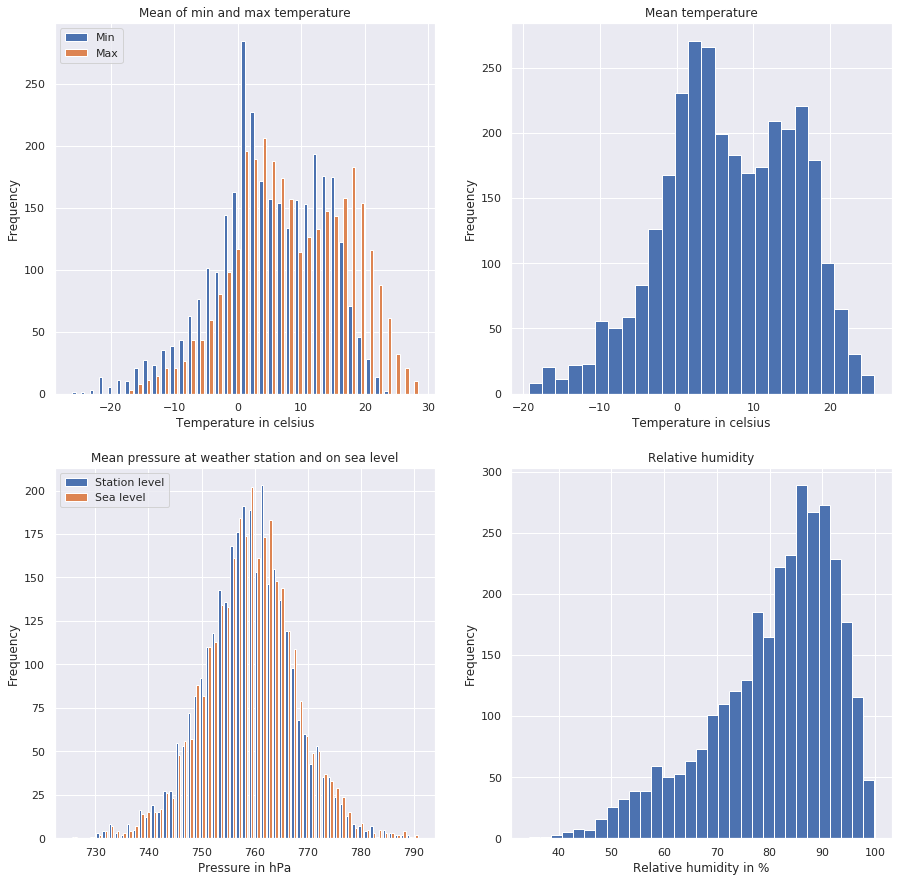

In [176]:
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.1  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.2  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height

histograms, axes = plt.subplots(2,2)

sns.set(rc={'figure.figsize':(15, 15)})

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

axes[0][0].hist([dfAnalysis["Tn_mu"], dfAnalysis["Tx_mu"]], bins = "auto", label = ["Min", "Max"])
axes[0][0].set_title('Mean of min and max temperature')
axes[0][0].set_xlabel("Temperature in celsius")
axes[0][0].set_ylabel("Frequency")
axes[0][0].legend(loc='upper left', frameon = True)

axes[0][1].hist([dfAnalysis["T_mu"]], bins = "auto")
axes[0][1].set_title('Mean temperature')
axes[0][1].set_xlabel("Temperature in celsius")
axes[0][1].set_ylabel("Frequency")

axes[1][0].hist([dfAnalysis["Po_mu"], dfAnalysis["P_mu"]],  bins = "auto", label = ["Station level", "Sea level"])
axes[1][0].set_title('Mean pressure at weather station and on sea level')
axes[1][0].set_xlabel("Pressure in hPa")
axes[1][0].set_ylabel("Frequency")
axes[1][0].legend(loc='upper left', frameon = True)

axes[1][1].hist(dfAnalysis["U_mu"],  bins = "auto")
axes[1][1].set_title('Relative humidity')
axes[1][1].set_xlabel("Relative humidity in %")
axes[1][1].set_ylabel("Frequency")

#histograms.suptitle('Histograms', fontsize=25)

histograms.savefig("Histograms.png")

## Pair plots

### T mu, P mu, Td mu, Ff mu, VV mu, U mu

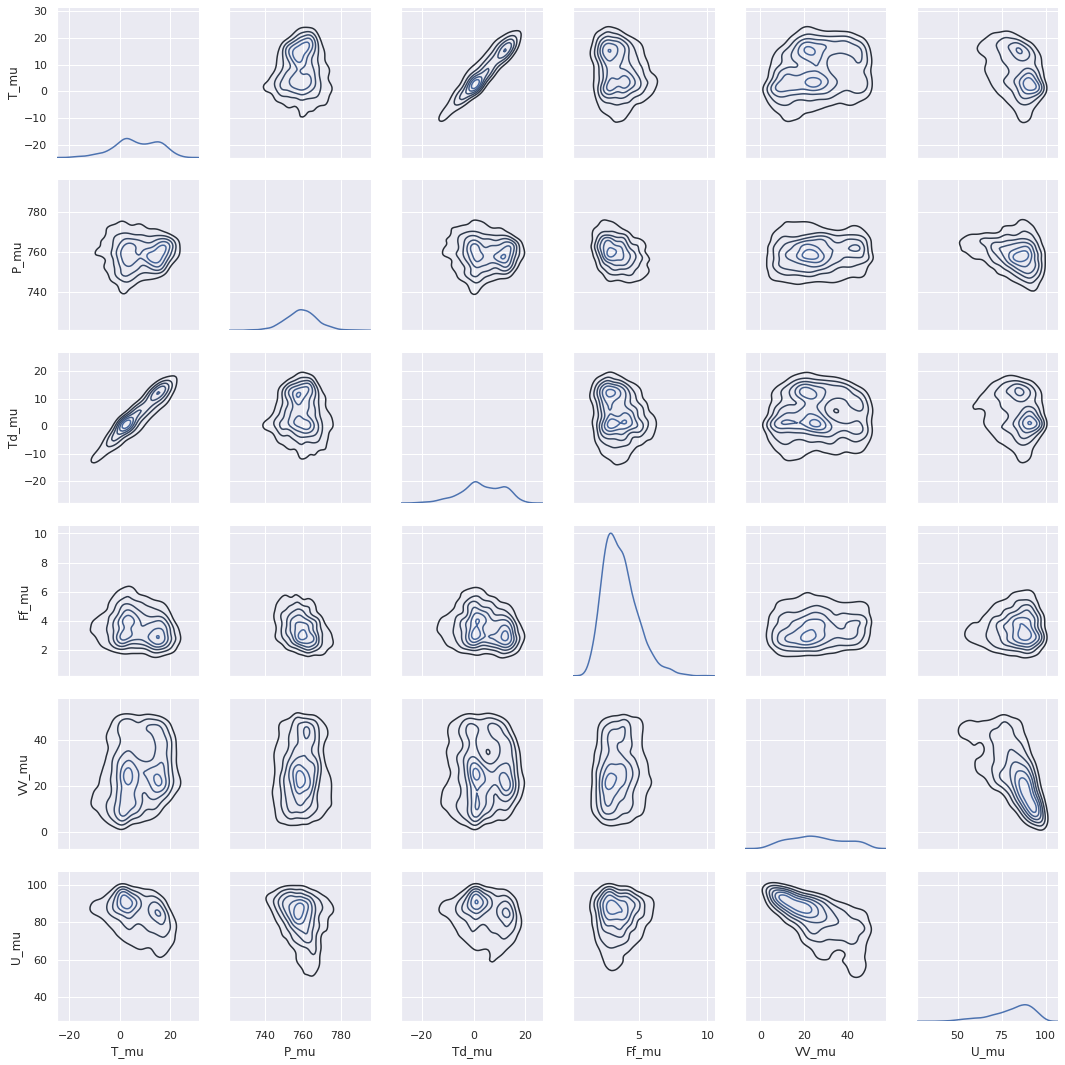

In [25]:
#pairplot = sns.pairplot(dfAnalysis[['T_mu', 'P_mu', 'Td_mu', 'Ff_mu', 'VV_mu', 'U_mu']])
pairGrid = sns.PairGrid(dfAnalysis[['T_mu', 'P_mu', 'Td_mu', 'Ff_mu', 'VV_mu', 'U_mu']])
pairGrid.map_diag(sns.kdeplot)
pairGrid.map_offdiag(sns.kdeplot, n_levels=6)

sns.set(rc={'figure.figsize':(20, 20)})

pairGrid.savefig("PairGrid.png")
#pairplot.fig.suptitle('Pairplot of mean temperature/pressure/dewpoint temperature/wind speed/horizontal visibility/relative humidity', y=1.08, fontsize=25)
#pairplot.savefig("Pairplot.png")

## Correlationmatrix
### Correlation matrix with values > 0.75 or < -0.75

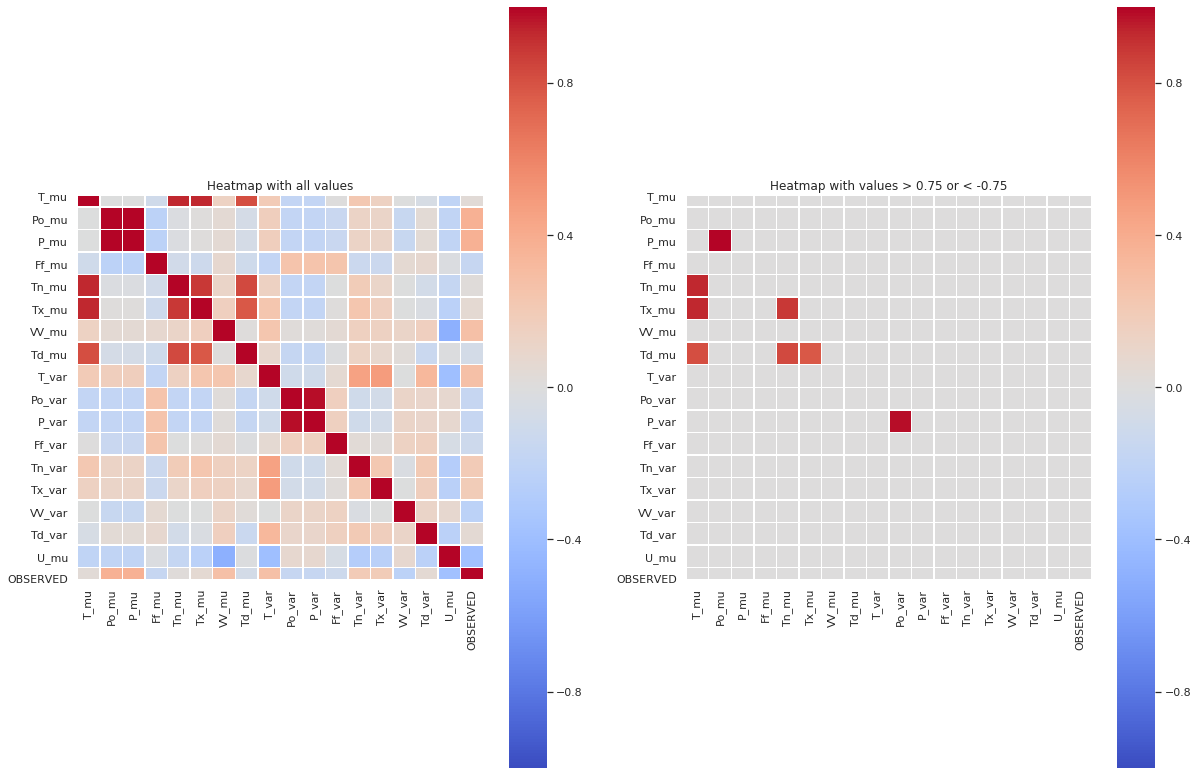

In [26]:
dfRes = dfAnalysis.corr(method ='kendall')
dfRes = dfRes[(dfRes > 0.75) | (dfRes < -0.75)]
dfRes = dfRes.fillna(0)
dfRes.values[[np.arange(dfRes.shape[0])]*2] = 0
mask = np.zeros_like(dfRes, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
dfRes[mask] = 0


corrMatHM, ax = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10, 5)})
sns.heatmap(dfAnalysis.corr(method ='kendall'), ax = ax[0],
            vmax = 1.0, vmin=-1.0,
            linewidths=.5, square=True,
            cbar_kws={"shrink": .7},
            cmap='coolwarm',
            annot=False)

ax[0].set_title("Heatmap with all values")

sns.heatmap(dfRes, ax = ax[1],
            vmax = 1.0, vmin=-1.0,
            linewidths=.5, square=True,
            cbar_kws={"shrink": .7},
            cmap='coolwarm',
            annot=False)
ax[1].set_title("Heatmap with values > 0.75 or < -0.75")# or <-0.75")

#corrMatHM.suptitle("Correlationmatrix of all features")
corrMatHM.savefig("CorrMatHM.png")
plt.show()

### Correlationmatrix with Seaborn Heatmap, upper triangle and color diverging palette

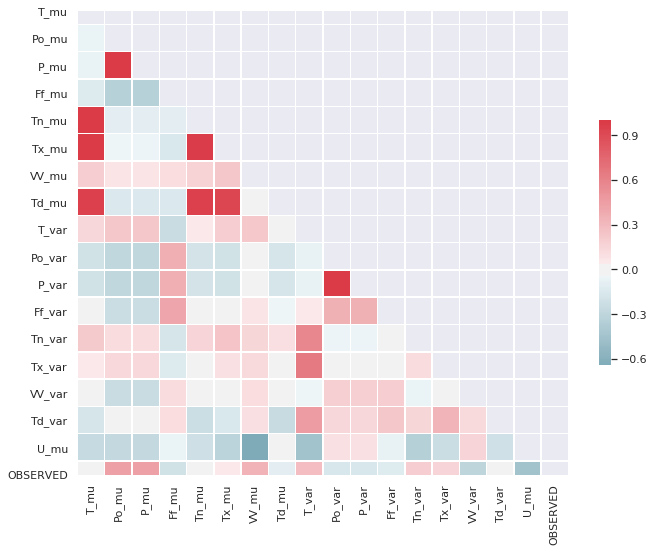

In [27]:
# Generate a mask for the upper triangle
mask = np.zeros_like(dfAnalysis.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfAnalysis.corr(), mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Matplotlib Correlationmatrix

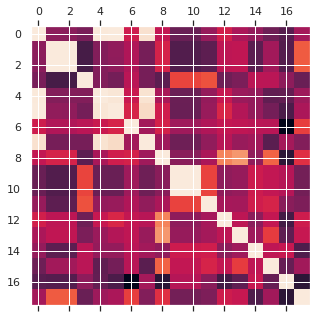

In [28]:
plt.matshow(dfAnalysis.corr())
plt.show()

### Correlationmatrix with Gradient

In [29]:
dfAnalysis.corr().style.background_gradient(cmap='RdBu_r')
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas/50703596

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,U_mu,OBSERVED
T_mu,1,-0.0634754,-0.0647653,-0.129089,0.99202,0.993854,0.197904,0.955727,0.144131,-0.195955,-0.196021,-0.0209119,0.211934,0.0566748,-0.0285134,-0.178432,-0.260787,0.0305501
Po_mu,-0.0634754,1,0.999989,-0.335656,-0.0899721,-0.0440898,0.0735027,-0.146007,0.225118,-0.283857,-0.283139,-0.240412,0.12575,0.134974,-0.243616,0.0231771,-0.269538,0.440013
P_mu,-0.0647653,0.999989,1,-0.335417,-0.0912599,-0.0453717,0.0731941,-0.147263,0.22503,-0.283367,-0.282725,-0.240176,0.125396,0.135071,-0.243537,0.0235145,-0.269277,0.439918
Ff_mu,-0.129089,-0.335656,-0.335417,1,-0.10194,-0.149504,0.10937,-0.14673,-0.24645,0.361483,0.361153,0.409312,-0.174823,-0.126245,0.11764,0.11022,-0.0571795,-0.192452
Tn_mu,0.99202,-0.0899721,-0.0912599,-0.10194,1,0.979744,0.167064,0.961942,0.0510356,-0.189527,-0.189645,-0.0295696,0.165914,-0.0108765,-0.0287533,-0.230666,-0.213275,0.00181042
Tx_mu,0.993854,-0.0440898,-0.0453717,-0.149504,0.979744,1,0.232505,0.934206,0.202114,-0.1979,-0.197961,-0.0146687,0.244814,0.0847651,-0.0313869,-0.148372,-0.311506,0.0566081
VV_mu,0.197904,0.0735027,0.0731941,0.10937,0.167064,0.232505,1,0.0217027,0.221391,0.0111468,0.0113873,0.0748892,0.149622,0.128403,0.10972,0.105754,-0.640893,0.340921
Td_mu,0.955727,-0.146007,-0.147263,-0.14673,0.961942,0.934206,0.0217027,1,0.00748227,-0.175056,-0.175116,-0.0427874,0.104634,-0.0136028,0.0223929,-0.254667,0.0319934,-0.098111
T_var,0.144131,0.225118,0.22503,-0.24645,0.0510356,0.202114,0.221391,0.00748227,1,-0.073988,-0.0734966,0.0533737,0.581422,0.648124,-0.0424512,0.465716,-0.442629,0.28378
Po_var,-0.195955,-0.283857,-0.283367,0.361483,-0.189527,-0.1979,0.0111468,-0.175056,-0.073988,1,0.999595,0.358113,-0.0463868,-0.0233537,0.190429,0.144366,0.0907483,-0.156247


## Imputation

### Imputation by predecessor

In [30]:
#dfTrainX
#dfTrainY
#dfTestX
#dfTestY

### Imputation by variance of last year

## PCA with standardization reducing on 2 components

In [31]:
def explain_variance(orig_var, pca_var):
    orig_var_total = sum(orig_var)
    pca_var_total = sum(pca_var)

    # cumsum()
    orig_cum = np.cumsum(orig_var)
    pca_cum = np.cumsum(pca_var)

    # turn cumsum() to percentages
    orig_cum = [x / orig_var_total for x in orig_cum]
    pca_cum = [x / pca_var_total for x in pca_cum]
    
    for i in range(len(pca_cum)):
        print(f'Percentage covered by PCA with {i+1} dimension: {pca_cum[i]}')

    print('Original var cumsum\n', orig_cum)
    print('Var cumsum after pca\n', pca_cum)

    f, ax = plt.subplots()
    ax.plot(range(1, 1 + len(orig_cum)), orig_cum, '--bo', label='Original variance')
    ax.plot(range(1, 1 + len(pca_cum)), pca_cum, '-ro', label='PCA explained variance')
    ax.legend()
    sns.set(rc={'figure.figsize':(5, 5)})
    plt.minorticks_on()
    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle=':')
    plt.show()

In [32]:
# To compare variances, we have to normalize original data
X_norm = (dfTrainX - dfTrainX.min(axis=0))/(dfTrainX.max(axis=0) - dfTrainX.min(axis=0))
# Compute variances by column
orig_var = X_norm.var().tolist()

In [33]:
pca = skd.PCA(n_components = 16)
X = StandardScaler().fit_transform(dfTrainX)

pca.fit(X)
print("PCA components: ", pca.components_)
print("Explained variance ratio: ", pca.explained_variance_ratio_)
print("Singular values: ", pca.singular_values_)

X = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X.shape)

PCA components:  [[-4.56106314e-01 -4.97813715e-02 -4.91573531e-02  1.61951321e-01
  -4.49356059e-01 -4.56679337e-01 -8.80079197e-02 -4.33614253e-01
  -1.07043752e-01  2.19419172e-01  2.19424774e-01  9.56842138e-02
  -1.37485250e-01 -4.70412373e-02  5.92109245e-02  1.14340398e-01]
 [ 1.59877606e-01 -4.50955194e-01 -4.51085206e-01  3.00921851e-01
   1.80902432e-01  1.44322937e-01  1.62193657e-02  1.98161432e-01
  -1.92609675e-01  3.24111245e-01  3.23858052e-01  2.59825362e-01
  -9.73790045e-02 -1.37500680e-01  1.97594565e-01 -4.45909962e-02]
 [ 4.65099142e-02  4.95514718e-02  4.96038037e-02  4.56150117e-02
  -6.02148122e-03  7.89744203e-02  2.45291369e-01 -4.64941162e-02
   5.26948870e-01  2.19165990e-01  2.19567956e-01  2.50213426e-01
   3.40252333e-01  4.13800844e-01  1.11837098e-01  4.31510630e-01]
 [ 8.76420064e-02  4.61653992e-01  4.61557749e-01  9.90151025e-02
   1.03532258e-01  8.36932923e-02  1.40421637e-01  4.84552291e-02
  -1.72038498e-01  4.20969456e-01  4.21337556e-01  7.593

In [23]:
#dfX_pca_2comp = pd.DataFrame(X_pca_2comp, columns = ["PCA_Component_1", "PCA_Component_2"])
dfX = pd.DataFrame(X)
dfX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.597323,1.369902,-1.088322,-1.003837,0.527500,-0.603659,0.588842,0.580921,0.177896,0.217448,0.227034,0.095819,-0.000808,0.000531,0.001412,0.000490
1,-1.428895,0.770860,0.336219,0.431522,0.466703,-0.799210,-0.285562,-0.455824,0.317243,0.620918,0.141248,-0.088980,0.089914,-0.052191,0.026397,-0.005170
2,-2.115870,-0.344940,-0.487298,0.216391,1.061982,-0.461752,1.316505,-0.044602,-0.408506,0.263015,0.370009,-0.017431,0.025087,-0.025849,0.006260,-0.001444
3,-2.132857,-1.227838,-0.654058,0.276633,1.298859,-0.919950,1.416722,0.256507,-0.094864,0.344554,0.137375,0.005964,0.094157,0.041283,-0.002626,0.002315
4,-1.925155,-0.537394,-0.815135,0.667565,0.994975,0.007075,0.837961,0.575342,0.185913,0.350180,0.035047,-0.092426,0.013965,-0.002003,-0.000618,0.000223


Percentage covered by PCA with 1 dimension: 0.26850610102423544
Percentage covered by PCA with 2 dimension: 0.4671217521065881
Percentage covered by PCA with 3 dimension: 0.6162799047152555
Percentage covered by PCA with 4 dimension: 0.6958791930699679
Percentage covered by PCA with 5 dimension: 0.7622292889153659
Percentage covered by PCA with 6 dimension: 0.8187234745577402
Percentage covered by PCA with 7 dimension: 0.8724842193446988
Percentage covered by PCA with 8 dimension: 0.9219592759796306
Percentage covered by PCA with 9 dimension: 0.9574844420579844
Percentage covered by PCA with 10 dimension: 0.987247698677777
Percentage covered by PCA with 11 dimension: 0.9974311258793426
Percentage covered by PCA with 12 dimension: 0.9993998351628646
Percentage covered by PCA with 13 dimension: 0.9998474898268745
Percentage covered by PCA with 14 dimension: 0.9999741771717515
Percentage covered by PCA with 15 dimension: 0.9999995829191912
Percentage covered by PCA with 16 dimension: 1.0


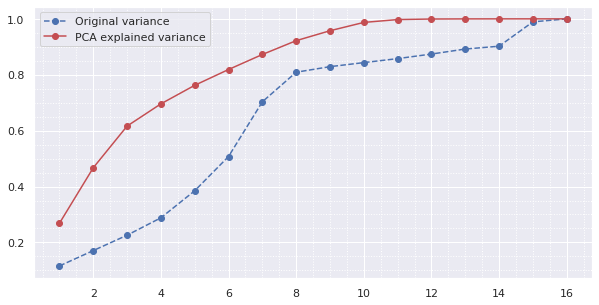

In [24]:
pca_var = dfX.var().tolist()

explain_variance(orig_var, pca_var)

In [25]:
dfX = pd.DataFrame(X, columns = dfTrainX.columns)
dfX.head()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
0,-1.597323,1.369902,-1.088322,-1.003837,0.527500,-0.603659,0.588842,0.580921,0.177896,0.217448,0.227034,0.095819,-0.000808,0.000531,0.001412,0.000490
1,-1.428895,0.770860,0.336219,0.431522,0.466703,-0.799210,-0.285562,-0.455824,0.317243,0.620918,0.141248,-0.088980,0.089914,-0.052191,0.026397,-0.005170
2,-2.115870,-0.344940,-0.487298,0.216391,1.061982,-0.461752,1.316505,-0.044602,-0.408506,0.263015,0.370009,-0.017431,0.025087,-0.025849,0.006260,-0.001444
3,-2.132857,-1.227838,-0.654058,0.276633,1.298859,-0.919950,1.416722,0.256507,-0.094864,0.344554,0.137375,0.005964,0.094157,0.041283,-0.002626,0.002315
4,-1.925155,-0.537394,-0.815135,0.667565,0.994975,0.007075,0.837961,0.575342,0.185913,0.350180,0.035047,-0.092426,0.013965,-0.002003,-0.000618,0.000223


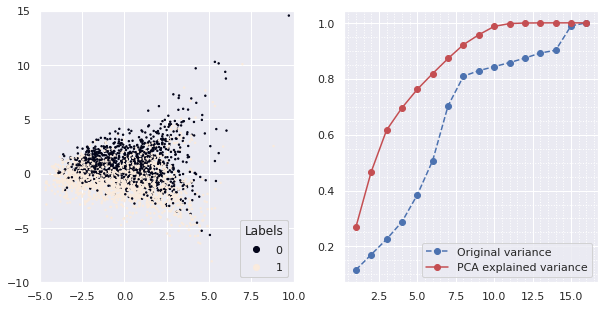

In [27]:
pcaPlot, ax = plt.subplots(1,2)

sns.set(rc={'figure.figsize':(15, 5)})

#
#------------------------------------------------------------------------#
#-----------------------     Pca Plot      ------------------------------#
#------------------------------------------------------------------------#

scatter = ax[0].scatter(dfX.iloc[:, 0], dfX.iloc[:, 1], c = dfTrainY["OBSERVED"], s = 2)

sns.set(rc={'figure.figsize':(10, 5)})

ax[0].set_ylim((-10,15))
ax[0].set_xlim((-5,10))

# produce a legend with the unique colors from the scatter
legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="lower right", title="Labels")
ax[0].add_artist(legend1)
#pcaPlot.suptitle("PCA - First two dimensions", fontsize = 25)

#ax[0].set_ylabel('Second PCA component')
#ax[0].set_xlabel('First PCA component')

#
#------------------------------------------------------------------------#
#-----------------------     Cum Sum       ------------------------------#
#------------------------------------------------------------------------#

orig_var_total = sum(orig_var)
pca_var_total = sum(pca_var)

# cumsum()
orig_cum = np.cumsum(orig_var)
pca_cum = np.cumsum(pca_var)

# turn cumsum() to percentages
orig_cum = [x / orig_var_total for x in orig_cum]
pca_cum = [x / pca_var_total for x in pca_cum]

ax[1].plot(range(1, 1 + len(orig_cum)), orig_cum, '--bo', label='Original variance')
ax[1].plot(range(1, 1 + len(pca_cum)), pca_cum, '-ro', label='PCA explained variance')
ax[1].legend()
plt.minorticks_on()
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle=':')

pcaPlot.savefig("PCA_Projection_CSVar.png")

# Regression

In [102]:
dfTrainX_Regression = pd.DataFrame(dfTrainX, columns = dfTrainX.columns)

dfTestX_Regression = pd.DataFrame(dfTestX, columns = dfTrainX.columns)

dfTrainY_Regression = pd.DataFrame(dfTrainY, columns = ["U_mu"])

dfTestY_Regression = pd.DataFrame(dfTestY, columns = ["U_mu"])

In [103]:
reg = LinearRegression().fit(dfTrainX_Regression, dfTrainY_Regression)
intLen = len(dfTrainX.iloc[:,0])
modelRegression = []
for i in range(intLen):
    modelRegression.append(reg.intercept_ + np.dot(reg.coef_, dfTrainX_Regression.iloc[i,:]))
arrModelRegression = np.array(modelRegression)
arrModelRegression = arrModelRegression.flatten()

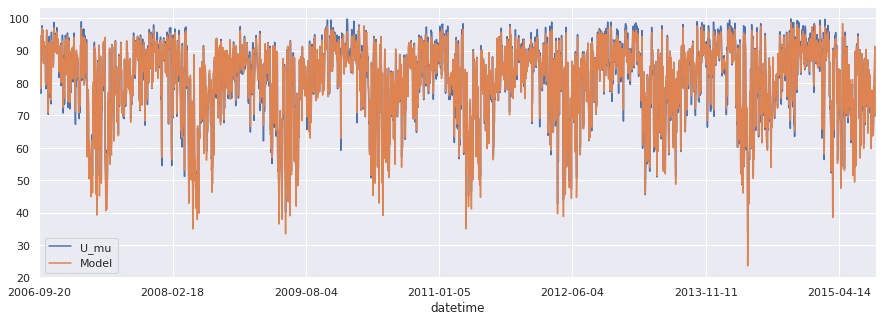

In [113]:
dfPlotTrain = pd.DataFrame(dfTrainY, columns = ["U_mu"])
dfPlotTrain["Model"] = arrModelRegression
plotModelAll, axModelAll = plt.subplots()
sns.set(rc={'figure.figsize':(15, 5)})
dfPlotTrain.plot(ax = axModelAll)
plt.show()
plotModelAll.savefig("ModelAll.png")

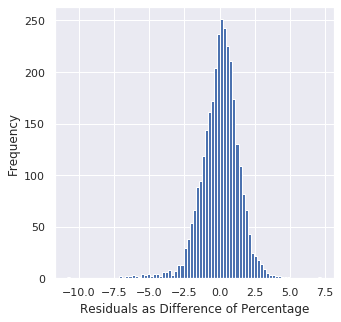

In [115]:
arrResiduals = arrModelRegression - dfTrainY["U_mu"]
plotResidual, axResidual = plt.subplots()
axResidual.hist(arrResiduals, bins = "auto")
sns.set(rc={'figure.figsize':(5, 5)})
plt.ylabel("Frequency")
plt.xlabel("Residuals as Difference of Percentage")
plt.show()
plotResidual.savefig("Residuals.png")

In [109]:
arrNestedPrediction = reg.predict(dfTestX_Regression)
arrPrediction = arrNestedPrediction.flatten() 

dfPlotTest = pd.DataFrame(dfTestY, columns = ["U_mu"])
dfPlotTest["Prediction"] = arrPrediction

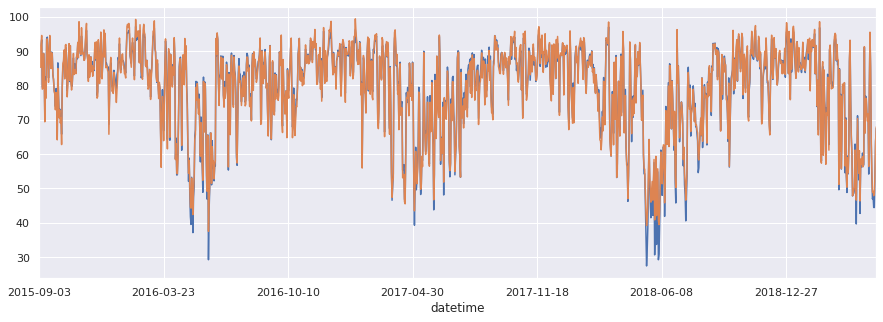

In [117]:
plotPredictionAll, axPredictionAll = plt.subplots()
dfPlotTest.iloc[:, 1].plot(ax = axPredictionAll)
dfPlotTest.iloc[:, 0].plot(ax = axPredictionAll)
sns.set(rc={'figure.figsize':(15, 5)})
plotPredictionAll.savefig("PredictionAll.png")

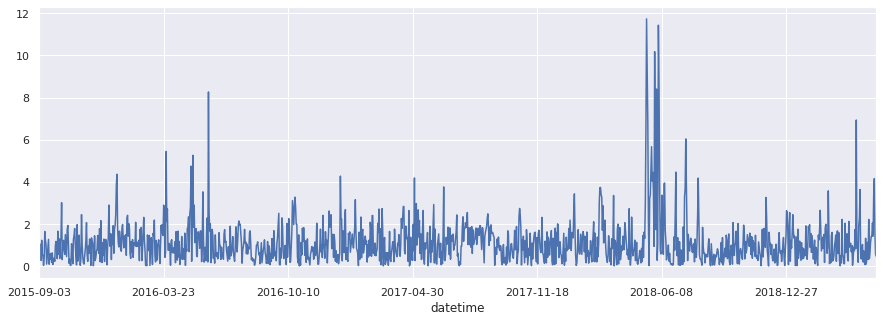

In [118]:
absDeviationAll, ax = plt.subplots()
dfPlotTest["AbsoluteDeviation"] = abs(dfPlotTest.iloc[:, 0]-dfPlotTest.iloc[:, 1])
dfPlotTest.iloc[:, 2].plot(ax = ax)
plt.show()
sns.set(rc={'figure.figsize':(15, 5)})
absDeviationAll.savefig("AbsDeviationAll.png")

In [112]:
MSE = mean_squared_error(dfPlotTest.iloc[:, 0], dfPlotTest.iloc[:, 1])
RMSE = np.sqrt(MSE)
print("Mean squared error:", MSE)
print("Root mean squared error:", RMSE)

Mean squared error: 2.4295688076984683
Root mean squared error: 1.558707415680848


# Regression standardized

In [27]:
dfTrainY_reg = dfTrainY["U_mu"]
dfTestY_reg = dfTestY["U_mu"]

scaler_Regression_TrainX = StandardScaler()
dfTrainX_Regression = scaler_Regression_TrainX.fit(dfTrainX)
dfTrainX_Regression = scaler_Regression_TrainX.transform(dfTrainX)
dfTrainX_Regression = pd.DataFrame(dfTrainX_Regression, columns = dfTrainX.columns)
dfTrainX_Regression.index = dfTrainX.index

scaler_Regression_TestX = StandardScaler()
dfTestX_Regression = scaler_Regression_TestX.fit(dfTestX)
dfTestX_Regression = scaler_Regression_TestX.transform(dfTestX)
dfTestX_Regression = pd.DataFrame(dfTestX_Regression, columns = dfTrainX.columns)
dfTestX_Regression.index = dfTestX.index

dfTrainY_Regression = pd.DataFrame(dfTrainY["U_mu"], columns = ["U_mu"])
scaler_Regression_TrainY = StandardScaler()
scaler_Regression_TrainY = scaler_Regression_TrainY.fit(dfTrainY_Regression)
dfTrainY_Regression = scaler_Regression_TrainY.transform(dfTrainY_Regression)
dfTrainY_Regression = pd.DataFrame(dfTrainY_Regression, columns = ["U_mu"])

dfTestY_Regression = pd.DataFrame(dfTestY["U_mu"], columns = ["U_mu"])
scaler_Regression_TestY = StandardScaler()
scaler_Regression_TestY = scaler_Regression_TestY.fit(dfTestY_Regression)
dfTestY_Regression = scaler_Regression_TestY.transform(dfTestY_Regression)
dfTestY_Regression = pd.DataFrame(dfTestY_Regression, columns = ["U_mu"])

In [38]:
reg = LinearRegression().fit(dfTrainX_Regression, dfTrainY_Regression)
intLen = len(dfTrainX.iloc[:,0])
modelRegression = []
for i in range(intLen):
    modelRegression.append(reg.intercept_ + np.dot(reg.coef_, dfTrainX_Regression.iloc[i,:]))
arrModelRegression = np.array(modelRegression)
arrModelRegression = arrModelRegression.flatten()



In [42]:
arrModelRegression_BT = scaler_Regression_TrainY.inverse_transform(arrModelRegression)

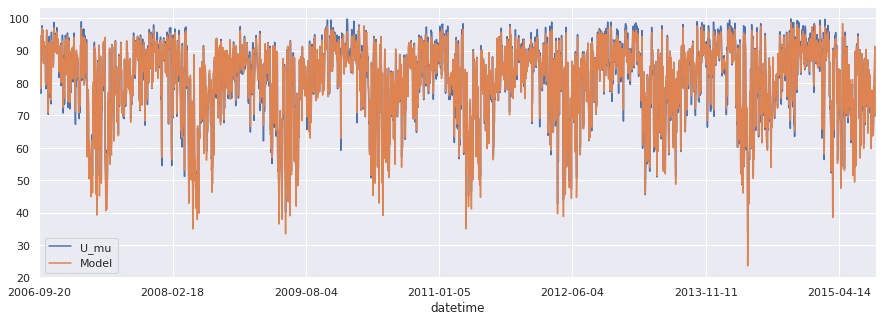

In [59]:
dfPlotTrain = pd.DataFrame(dfTrainY, columns = ["U_mu"])
dfPlotTrain["Model"] = arrModelRegression_BT
plotModelAll, axModelAll = plt.subplots()
sns.set(rc={'figure.figsize':(15, 5)})
dfPlotTrain.plot(ax = axModelAll)
plt.show()

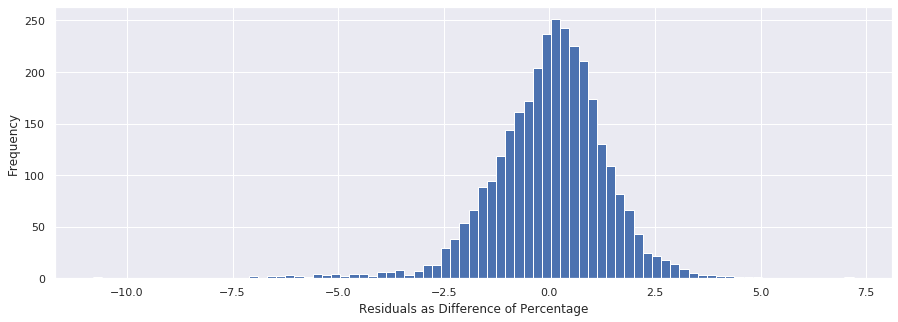

In [53]:
arrResiduals = arrModelRegression_BT - dfTrainY["U_mu"]
plotResidual, axResidual = plt.subplots()
axResidual.hist(arrResiduals, bins = "auto")
sns.set(rc={'figure.figsize':(5, 5)})
plt.ylabel("Frequency")
plt.xlabel("Residuals as Difference of Percentage")
plt.show()

In [67]:
arrNestedPrediction = reg.predict(dfTestX_Regression)
arrPrediction = arrNestedPrediction.flatten() 
arrPrediction_BT = scaler_Regression_TestY.inverse_transform(arrPrediction)

dfPlotTest = pd.DataFrame(dfTestY, columns = ["U_mu"])
dfPlotTest["Prediction"] = arrPrediction_BT

array([96.1930026 , 91.22514648, 87.70602357, ..., 49.18415196,
       62.23044003, 66.55798728])

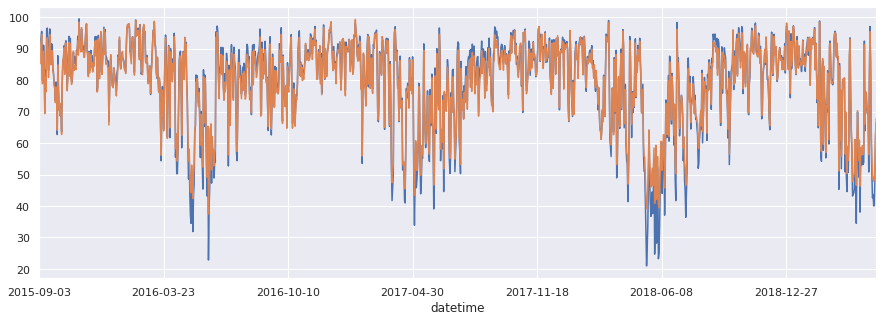

In [71]:
plotPredictionAll, axPredictionAll = plt.subplots()
dfPlotTest.iloc[:, 1].plot(ax = axPredictionAll)
dfPlotTest.iloc[:, 0].plot(ax = axPredictionAll)
sns.set(rc={'figure.figsize':(15, 5)})

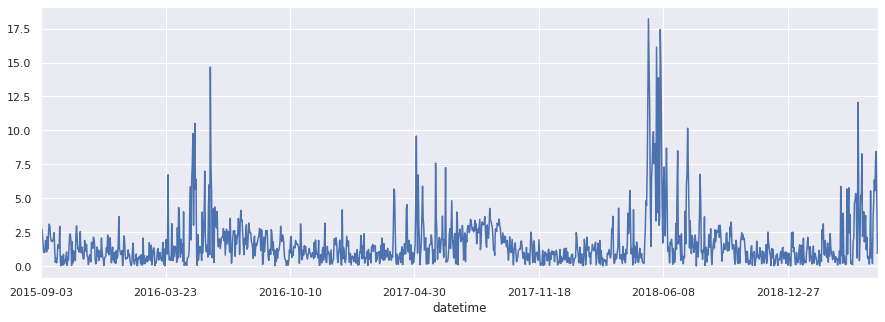

In [73]:
absDeviationAll, ax = plt.subplots()
dfPlotTest["AbsoluteDeviation"] = abs(dfPlotTest.iloc[:, 0]-dfPlotTest.iloc[:, 1])
dfPlotTest.iloc[:, 2].plot(ax = ax)
plt.show()
sns.set(rc={'figure.figsize':(15, 5)})

In [75]:
MSE = mean_squared_error(dfPlotTest.iloc[:, 0], dfPlotTest.iloc[:, 1])
RMSE = np.sqrt(MSE)
print("Mean squared error:", MSE)
print("Root mean squared error:", RMSE)

Mean squared error: 6.3152939968761626
Root mean squared error: 2.5130248699279045


# Regression standardized pca

In [76]:
dfTrainY_reg = dfTrainY["U_mu"]
dfTestY_reg = dfTestY["U_mu"]

scaler_Regression_TrainX = StandardScaler()
dfTrainX_Regression = scaler_Regression_TrainX.fit(dfTrainX)
dfTrainX_Regression = scaler_Regression_TrainX.transform(dfTrainX)
dfTrainX_Regression = pd.DataFrame(dfTrainX_Regression, columns = dfTrainX.columns)
dfTrainX_Regression.index = dfTrainX.index

scaler_Regression_TestX = StandardScaler()
dfTestX_Regression = scaler_Regression_TestX.fit(dfTestX)
dfTestX_Regression = scaler_Regression_TestX.transform(dfTestX)
dfTestX_Regression = pd.DataFrame(dfTestX_Regression, columns = dfTrainX.columns)
dfTestX_Regression.index = dfTestX.index

dfTrainY_Regression = pd.DataFrame(dfTrainY["U_mu"], columns = ["U_mu"])
scaler_Regression_TrainY = StandardScaler()
scaler_Regression_TrainY = scaler_Regression_TrainY.fit(dfTrainY_Regression)
dfTrainY_Regression = scaler_Regression_TrainY.transform(dfTrainY_Regression)
dfTrainY_Regression = pd.DataFrame(dfTrainY_Regression, columns = ["U_mu"])

dfTestY_Regression = pd.DataFrame(dfTestY["U_mu"], columns = ["U_mu"])
scaler_Regression_TestY = StandardScaler()
scaler_Regression_TestY = scaler_Regression_TestY.fit(dfTestY_Regression)
dfTestY_Regression = scaler_Regression_TestY.transform(dfTestY_Regression)
dfTestY_Regression = pd.DataFrame(dfTestY_Regression, columns = ["U_mu"])

In [86]:
pcaTrainX = skd.PCA(n_components = 8)
pcaTrainX.fit(dfTrainX_Regression)

TrainX_Regression = pcaTrainX.transform(dfTrainX_Regression)
TrainX_Regression = pd.DataFrame(TrainX_Regression)

pcaTestX = skd.PCA(n_components = 8)
pcaTestX.fit(dfTestX_Regression)

TestX_Regression = pcaTestX.transform(dfTestX_Regression)
TestX_Regression = pd.DataFrame(TestX_Regression)

In [81]:
reg = LinearRegression().fit(TrainX_Regression, dfTrainY_Regression)
intLen = len(dfTrainX.iloc[:,0])
modelRegression = []
for i in range(intLen):
    modelRegression.append(reg.intercept_ + np.dot(reg.coef_, TrainX_Regression.iloc[i,:]))
arrModelRegression = np.array(modelRegression)
arrModelRegression = arrModelRegression.flatten()


array([ 1.00673024, -0.0441715 ,  0.43586838, ..., -0.40355775,
        0.4623719 ,  0.38433926])

In [88]:
arrModelRegression_BT = scaler_Regression_TrainY.inverse_transform(arrModelRegression)

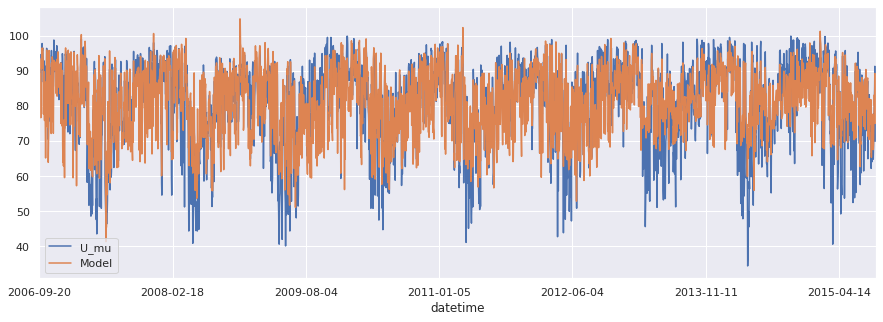

In [89]:
dfPlotTrain = pd.DataFrame(dfTrainY, columns = ["U_mu"])
dfPlotTrain["Model"] = arrModelRegression_BT
plotModelAll, axModelAll = plt.subplots()
sns.set(rc={'figure.figsize':(15, 5)})
dfPlotTrain.plot(ax = axModelAll)
plt.show()

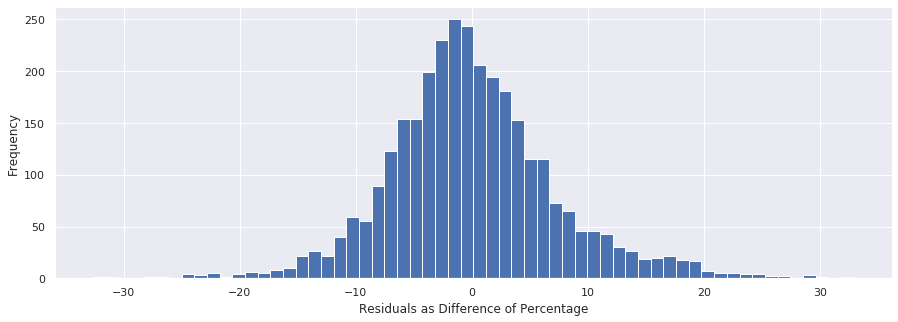

In [90]:
arrResiduals = arrModelRegression_BT - dfTrainY["U_mu"]
plotResidual, axResidual = plt.subplots()
axResidual.hist(arrResiduals, bins = "auto")
sns.set(rc={'figure.figsize':(5, 5)})
plt.ylabel("Frequency")
plt.xlabel("Residuals as Difference of Percentage")
plt.show()

In [92]:
arrNestedPrediction = reg.predict(TestX_Regression)
arrPrediction = arrNestedPrediction.flatten() 
arrPrediction_BT = scaler_Regression_TestY.inverse_transform(arrPrediction)

dfPlotTest = pd.DataFrame(dfTestY, columns = ["U_mu"])
dfPlotTest["Prediction"] = arrPrediction_BT

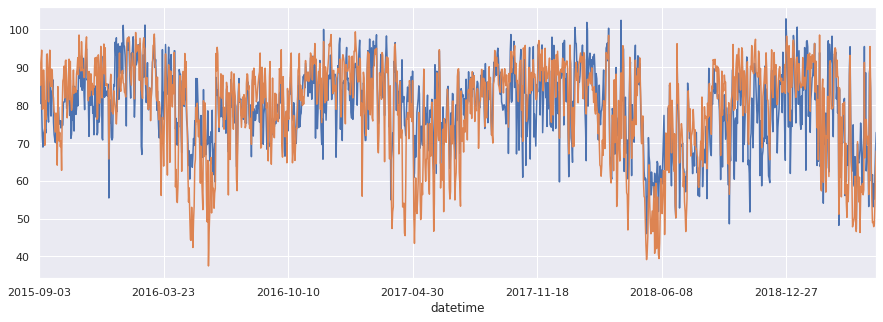

In [94]:
plotPredictionAll, axPredictionAll = plt.subplots()
dfPlotTest.iloc[:, 1].plot(ax = axPredictionAll)
dfPlotTest.iloc[:, 0].plot(ax = axPredictionAll)
sns.set(rc={'figure.figsize':(15, 5)})

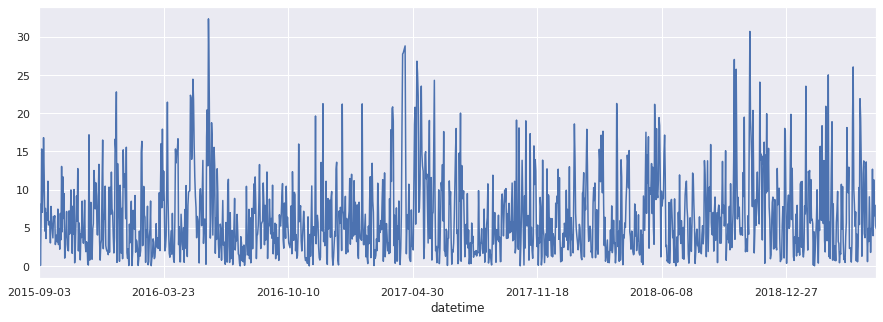

In [95]:
absDeviationAll, ax = plt.subplots()
dfPlotTest["AbsoluteDeviation"] = abs(dfPlotTest.iloc[:, 0]-dfPlotTest.iloc[:, 1])
dfPlotTest.iloc[:, 2].plot(ax = ax)
plt.show()
sns.set(rc={'figure.figsize':(15, 5)})

In [96]:
MSE = mean_squared_error(dfPlotTest.iloc[:, 0], dfPlotTest.iloc[:, 1])
RMSE = np.sqrt(MSE)
print("Mean squared error:", MSE)
print("Root mean squared error:", RMSE)

Mean squared error: 70.99958300651522
Root mean squared error: 8.42612502912906


# kNN Classification

In [167]:
dfTrainX_kNN = dfTrainX.copy()

dfTestX_kNN = dfTestX.copy()

dfTrainY_kNN = pd.DataFrame(dfTrainY["OBSERVED"], columns = ["OBSERVED"])

dfTestY_kNN = pd.DataFrame(dfTestY["OBSERVED"], columns = ["OBSERVED"])

In [168]:
arrTestValues = np.array(dfTestY_kNN["OBSERVED"])

In [169]:
arrSensSpec = np.zeros((20,2))

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(dfTrainX_kNN, dfTrainY_kNN)

    arrPrediction = knn.predict(dfTestX_kNN)

    TrueDry = sum(np.logical_and(arrPrediction, arrTestValues))
    TrueWet = sum(np.logical_and(np.logical_not(arrPrediction), np.logical_not(arrTestValues)))
    FalseDry = sum(np.logical_and(arrPrediction, np.logical_not(arrTestValues)))
    FalseWet = sum(np.logical_and(np.logical_not(arrPrediction), arrTestValues))

    ftSensitivity = TrueDry/(TrueDry + FalseWet)
    ftSpecifitiy = TrueWet/(TrueWet + FalseDry)
    
    arrSensSpec[i][0] = ftSensitivity
    arrSensSpec[i][1] = ftSpecifitiy

In [170]:
intNumKNN = len(arrSensSpec)
arrMinDistance = np.zeros(intNumKNN)

for i in range(intNumKNN):
    arrMinDistance[i] = np.linalg.norm(arrSensSpec[i]-np.array([1,1]), axis = 0)

idxMin = np.argmin(arrMinDistance)
ftMin = np.min(arrMinDistance)

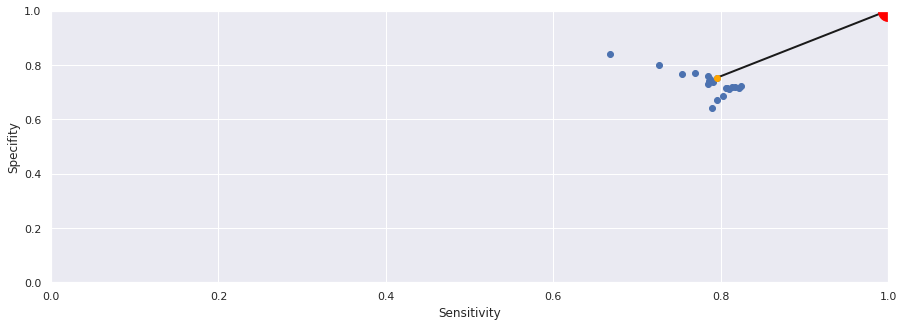

In [171]:
sensSpecPlot, ax = plt.subplots()

ax.scatter(arrSensSpec[:,0], arrSensSpec[:,1])
ax.plot([arrSensSpec[idxMin][0], 1], [arrSensSpec[idxMin][1], 1], color='k', linestyle='-', linewidth=2)
ax.plot(arrSensSpec[idxMin][0], arrSensSpec[idxMin][1], "bo", color = "orange")
ax.plot(1, 1, "bo", color = "red", markersize = 20)
ax.set_xlabel("Sensitivity")
ax.set_ylabel("Specifity")
ax.set_ylim((0,1))
ax.set_xlim((0,1))
sensSpecPlot.show()
sensSpecPlot.savefig("SensSpecPlot.png")

In [172]:
intBestK = idxMin + 1

In [173]:
knn = KNeighborsClassifier(n_neighbors = intBestK)
knn.fit(dfTrainX_kNN, dfTrainY_kNN)

arrPrediction = knn.predict(dfTestX_kNN)

TrueDry = sum(np.logical_and(arrPrediction, arrTestValues))
TrueWet = sum(np.logical_and(np.logical_not(arrPrediction), np.logical_not(arrTestValues)))
FalseDry = sum(np.logical_and(arrPrediction, np.logical_not(arrTestValues)))
FalseWet = sum(np.logical_and(np.logical_not(arrPrediction), arrTestValues))

ftSensitivity = TrueDry/(TrueDry + FalseWet)
ftSpecifitiy = TrueWet/(TrueWet + FalseDry)

In [174]:
accuracy = (TrueDry + TrueWet)/(TrueDry + TrueWet + FalseDry + FalseWet)
accuracy

0.7815750371471025

# k Nearest Neighbour classification pca

In [156]:
scaler_kNN_TrainX = StandardScaler()
dfTrainX_kNN = scaler_kNN_TrainX.fit_transform(dfTrainX)
dfTrainX_kNN = pd.DataFrame(dfTrainX_kNN, columns = dfTrainX.columns)
dfTrainX_kNN.index = dfTrainX.index

scaler_kNN_TestX = StandardScaler()
dfTestX_kNN = scaler_kNN_TestX.fit_transform(dfTestX)
dfTestX_kNN = pd.DataFrame(dfTestX_kNN, columns = dfTestX.columns)
dfTestX_kNN.index = dfTestX.index

dfTrainY_kNN_ZR = pd.DataFrame(dfTrainY["OBSERVED"], columns = ["OBSERVED"])
#scaler_kNN_TrainY = StandardScaler()
#dfTrainY_kNN = scaler_kNN_TrainY.fit_transform(dfTrainY_kNN_ZR)
#dfTrainY_kNN = pd.DataFrame(dfTrainY_kNN, columns = dfTrainY_kNN_ZR.columns)

dfTestY_kNN_ZR = pd.DataFrame(dfTestY["OBSERVED"], columns = ["OBSERVED"])
#scaler_kNN_TestY = StandardScaler()
#dfTestY_kNN = scaler_kNN_TestY.fit_transform(dfTestY_kNN_ZR)
#dfTestY_kNN = pd.DataFrame(dfTestY_kNN, columns = dfTestY_kNN_ZR.columns)

In [153]:
pcaTrainX = skd.PCA(n_components = 8)
pcaTrainX.fit(dfTrainX_kNN)

TrainX_kNN = pcaTrainX.transform(dfTrainX_kNN)
TrainX_kNN = pd.DataFrame(TrainX_kNN)

pcaTestX = skd.PCA(n_components = 8)
pcaTestX.fit(dfTestX_Regression)

TestX_kNN = pcaTestX.transform(dfTestX_kNN)
TestX_kNN = pd.DataFrame(TestX_kNN)

In [154]:
arrTestValues = np.array(dfTestY_kNN_ZR["OBSERVED"])

In [160]:
arrSensSpec = np.zeros((20,2))

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(TrainX_kNN, dfTrainY_kNN_ZR)

    arrPrediction = knn.predict(TestX_kNN)

    TrueDry = sum(np.logical_and(arrPrediction, arrTestValues))
    TrueWet = sum(np.logical_and(np.logical_not(arrPrediction), np.logical_not(arrTestValues)))
    FalseDry = sum(np.logical_and(arrPrediction, np.logical_not(arrTestValues)))
    FalseWet = sum(np.logical_and(np.logical_not(arrPrediction), arrTestValues))

    ftSensitivity = TrueDry/(TrueDry + FalseWet)
    ftSpecifitiy = TrueWet/(TrueWet + FalseDry)
    
    arrSensSpec[i][0] = ftSensitivity
    arrSensSpec[i][1] = ftSpecifitiy

In [161]:
intNumKNN = len(arrSensSpec)
arrMinDistance = np.zeros(intNumKNN)

for i in range(intNumKNN):
    arrMinDistance[i] = np.linalg.norm(arrSensSpec[i]-np.array([1,1]), axis = 0)

idxMin = np.argmin(arrMinDistance)
ftMin = np.min(arrMinDistance)

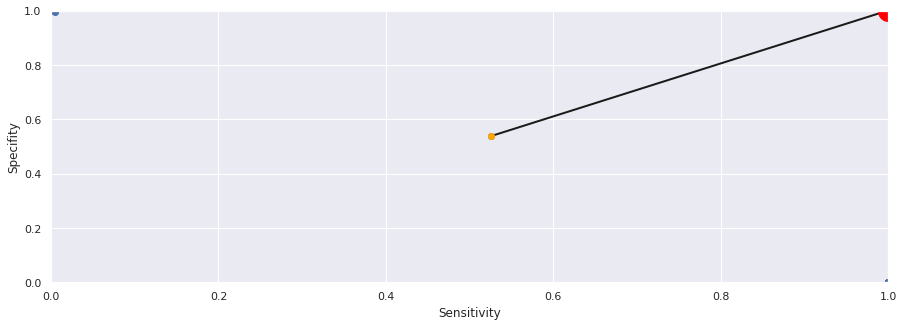

In [162]:
sensSpecPlot, ax = plt.subplots()

ax.scatter(arrSensSpec[:,0], arrSensSpec[:,1])
ax.plot([arrSensSpec[idxMin][0], 1], [arrSensSpec[idxMin][1], 1], color='k', linestyle='-', linewidth=2)
ax.plot(arrSensSpec[idxMin][0], arrSensSpec[idxMin][1], "bo", color = "orange")
ax.plot(1, 1, "bo", color = "red", markersize = 20)
ax.set_xlabel("Sensitivity")
ax.set_ylabel("Specifity")
ax.set_ylim((0,1))
ax.set_xlim((0,1))
sensSpecPlot.show()
sensSpecPlot.savefig("SensSpecPlot.png")

In [163]:
intBestK = idxMin + 1

In [165]:
knn = KNeighborsClassifier(n_neighbors = intBestK)
knn.fit(TrainX_kNN, dfTrainY_kNN_ZR)

arrPrediction = knn.predict(TestX_kNN)

TrueDry = sum(np.logical_and(arrPrediction, arrTestValues))
TrueWet = sum(np.logical_and(np.logical_not(arrPrediction), np.logical_not(arrTestValues)))
FalseDry = sum(np.logical_and(arrPrediction, np.logical_not(arrTestValues)))
FalseWet = sum(np.logical_and(np.logical_not(arrPrediction), arrTestValues))

ftSensitivity = TrueDry/(TrueDry + FalseWet)
ftSpecifitiy = TrueWet/(TrueWet + FalseDry)

In [166]:
accuracy = (TrueDry + TrueWet)/(TrueDry + TrueWet + FalseDry + FalseWet)
accuracy

0.5289747399702823